<a href="https://colab.research.google.com/github/HristoDinkov/MachineLearning_notebooks/blob/master/HousePricePredictionInCalifornia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting house prices in California given the sample data from Google Colab

From the data we see that there are only 7 data inputs. We will start with a basic data exploration and basic models and then we will dive deeper.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew #for some statistics


training_data_path = "/content/sample_data/california_housing_train.csv"
test_data_path = "/content/sample_data/california_housing_test.csv"


df = pd.read_csv(training_data_path)
df_test = pd.read_csv(test_data_path)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [2]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


There are no null values!

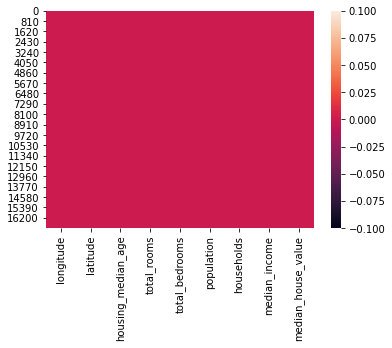

In [3]:
import seaborn as sns

sns.heatmap(df.isnull());

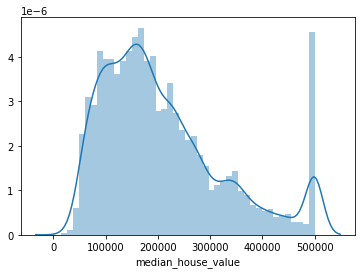

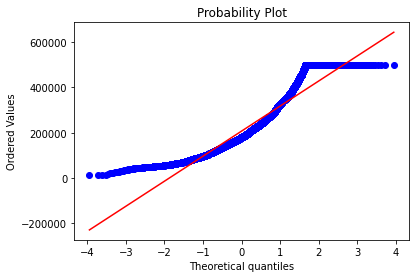

In [4]:
sns.distplot(df.median_house_value);
fig = plt.figure()
res = stats.probplot(df.median_house_value, plot=plt)
plt.show()

We see that there are a lot of houses witch are $500000 or above.

In [5]:
# df = df.loc[df.median_house_value < 500000]  
# sns.distplot(df.median_house_value);

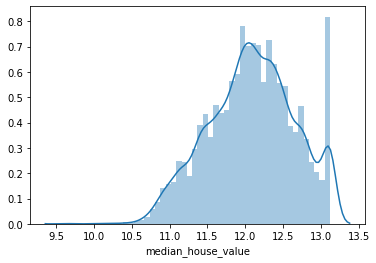

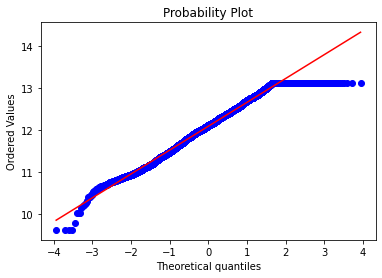

In [6]:
df['median_house_value'] = np.log(df['median_house_value'])
df_test['median_house_value'] = np.log(df_test['median_house_value'])
sns.distplot(df.median_house_value);

fig = plt.figure()
res = stats.probplot(df.median_house_value, plot=plt)
plt.show()

We see that the houses are not normally distributed. We have positive skewness and there are a lot of households with prices arount 50000.

In [7]:
#skewness and kurtosis
print("Skewness: %f" % df.median_house_value.skew())
print("Kurtosis: %f" % df.median_house_value.kurt())

Skewness: -0.178599
Kurtosis: -0.419055


##Correlation Heatmap


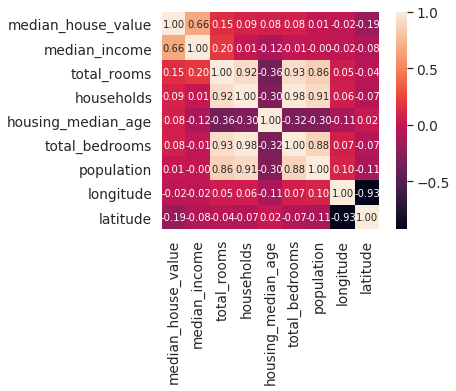

In [8]:
#correlation matrix
corrmat = df.corr()

#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'median_house_value')['median_house_value'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can see that:


*   There is a high correlation between households, total_bedrooms and population. The most correlative with house value is households, thats why we will drop the others
*   We see also a strong correlation between longitude and latitude. We will drop latitude.



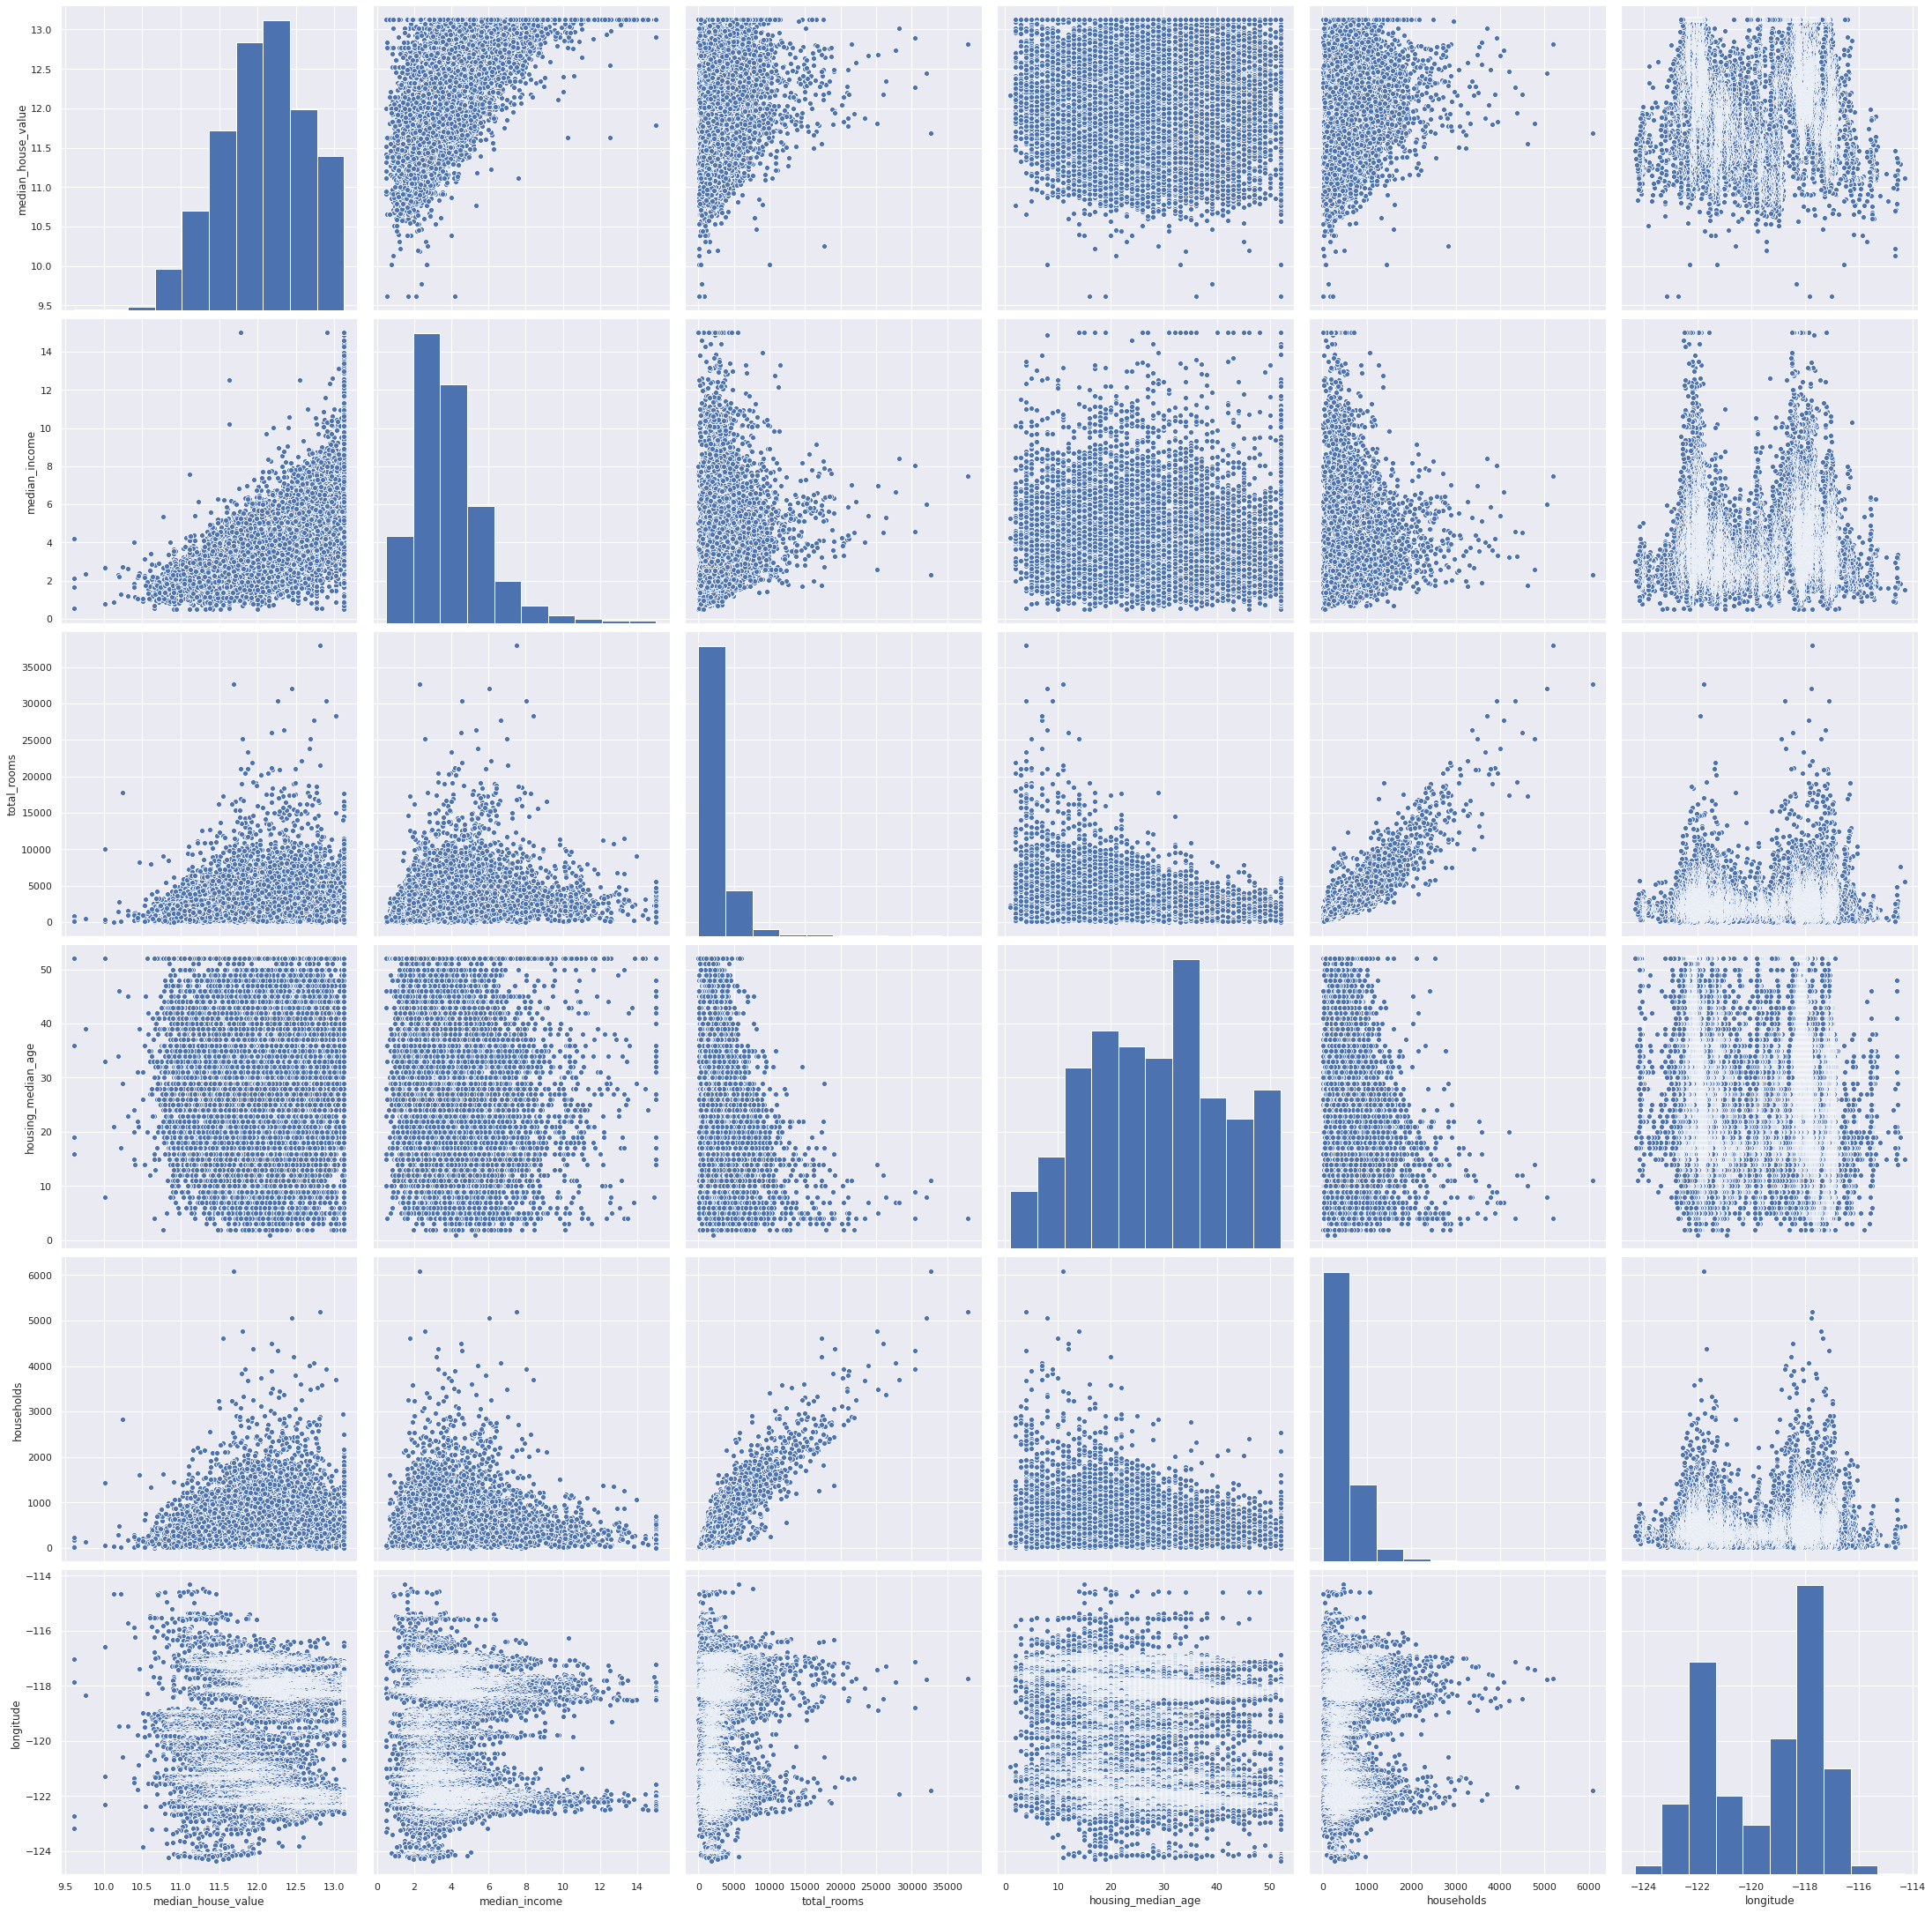

In [9]:
#scatterplot
sns.set()
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'households', 'longitude'];
sns.pairplot(df[cols], height = 5);
plt.show();

In [10]:

from sklearn.preprocessing import StandardScaler

X_train = df[cols]
y_train = df.iloc[:, -1]
X_test = df_test[cols]
y_test = df_test.iloc[:, -1]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor = SVR(kernel='rbf', degree=100, C=1, gamma=0.01, epsilon=.001)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [12]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE/Mean (Lower = Better):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / y_test.mean() )

Mean Absolute Error: 0.00112372859819199
Mean Squared Error: 3.319002020843463e-05
Root Mean Squared Error: 0.005761078042210037
RMSE/Mean (Lower = Better): 0.00047668519245347657


# Evaluation with Random Forest 

### Basic data analisys (without any change of the data besides normalizaiton):
* Mean Absolute Error: 31984.273743333335
* Mean Squared Error: 2415847304.343583
* Root Mean Squared Error: 49151.2696106986
* RMSE/Mean (Lower = Better): 0.23877658029370993

### Data analysys with more advanced techniques (dropping highly correlated columns)
* ean Absolute Error: 13.413981666666666
* Mean Squared Error: 1208.8761860083332
* Root Mean Squared Error: 34.76889681897217
* RMSE/Mean (Lower = Better): 0.00016890709739086692

### Data analysys with even more advanced techniques (+ standart deviation)
* Mean Absolute Error: 9.85223409508856e-05
* Mean Squared Error: 2.792023660870668e-07
* Root Mean Squared Error: 0.0005283960314830788
* RMSE/Mean (Lower = Better): 4.3720734576707847e-05

### Removing houses with value > 500000
* Mean Absolute Error: 0.00021674429137505117
* Mean Squared Error: 6.670007672054589e-07
* Root Mean Squared Error: 0.0008167011492617474
* RMSE/Mean (Lower = Better): 6.757578037659538e-05

## With SVM Regressor
* Mean Absolute Error: 0.00112372859819199
* Mean Squared Error: 3.319002020843463e-05
* Root Mean Squared Error: 0.005761078042210037
* RMSE/Mean (Lower = Better): 0.00047668519245347657

# Conclusion
Data analysis and data manipulation are far more important than model selection.